# **Traffic Accident Data**

### *Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.*

### About Dataset
#### Description
This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records.

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\PRODIGY_DS\\PRODIGY_DS_05\\US_Accidents_March23.csv")
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info

<bound method DataFrame.info of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        Na

In [5]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


In [7]:
df.describe(include=object)

,ID,Source,Start_Time,End_Time,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,7728394,7728394,7728394,7728394,7728389,7717525,7728141,7728394,7728394,7726479,7728394,7720586,7705759,7608166,7553188,7554935,7705148,7705148,7705148,7705148
unique,7728394,3,6131796,6705355,3761578,336306,13678,1871,49,825094,1,4,2045,941331,24,144,2,2,2,2
top,A-7777761,Source1,2021-01-26 16:16:13,2021-11-22 08:00:00,A crash has occurred causing no to minimum del...,I-95 N,Miami,Los Angeles,CA,91761,US,US/Eastern,KCQT,2022-03-13 01:53:00,CALM,Fair,Day,Day,Day,Day
freq,1,4325632,225,112,9593,78430,186917,526851,1741433,11247,7728394,3580167,118332,1311,961624,2560802,5334553,5695619,6076156,6377548


### Checking for null/missing values in the dataset

In [8]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

### Dropping the columns with huge number of null values

In [9]:
df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis=1,inplace=True)

In [10]:
df.drop(columns=['Wind_Speed(mph)', 'Visibility(mi)', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)'], axis=1, inplace=True)

In [11]:
df.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   5
Street                    10869
City                        253
County                        0
State                         0
Zipcode                    1915
Country                       0
Timezone                   7808
Airport_Code              22635
Weather_Timestamp        120228
Wind_Direction           175206
Weather_Condition        173459
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_

### Checking for duplicate values

In [12]:
df.duplicated().sum()

np.int64(0)

### EDA

### City with most Number of accidents

In [13]:
city_acc = df['City'].value_counts().sort_values(ascending = False).reset_index()
city_acc

,City,count
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
...,...,...
13673,Tamms,1
13674,Fort Recovery,1
13675,Odonnell,1
13676,Immaculata,1


### Top 10 cities with most number of accidents

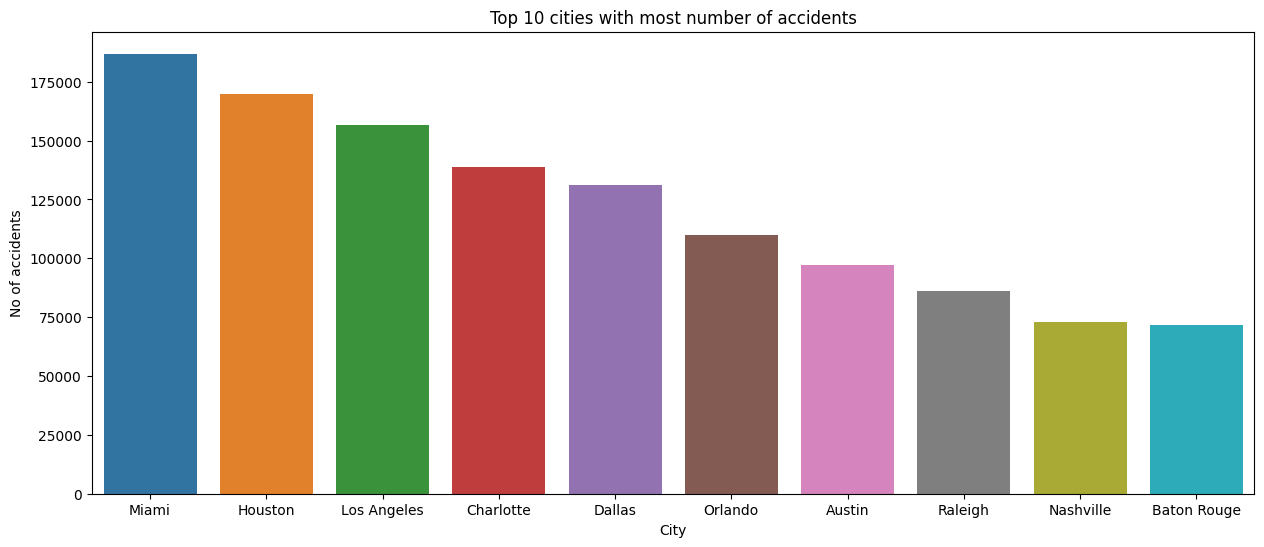

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='count',data= city_acc.head(10),hue='City')
plt.title("Top 10 cities with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

### Bottom 10 cities with least number of accidents

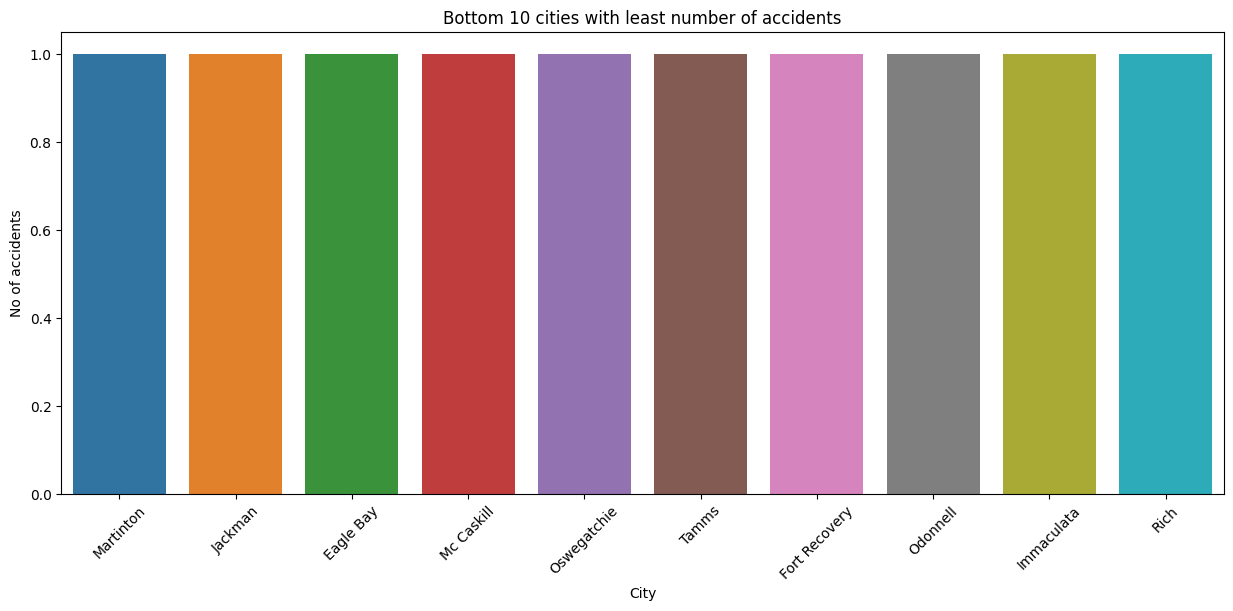

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='count',data= city_acc.tail(10),hue='City')
plt.title("Bottom 10 cities with least number of accidents")
plt.ylabel("No of accidents")
plt.xticks(rotation=45)
plt.show()

### State with most and least Number of accidents

In [16]:
state_acc = df['State'].value_counts().sort_values(ascending = False).reset_index()
state_acc

,State,count
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960
5,NC,338199
6,VA,303301
7,PA,296620
8,MN,192084
9,OR,179660


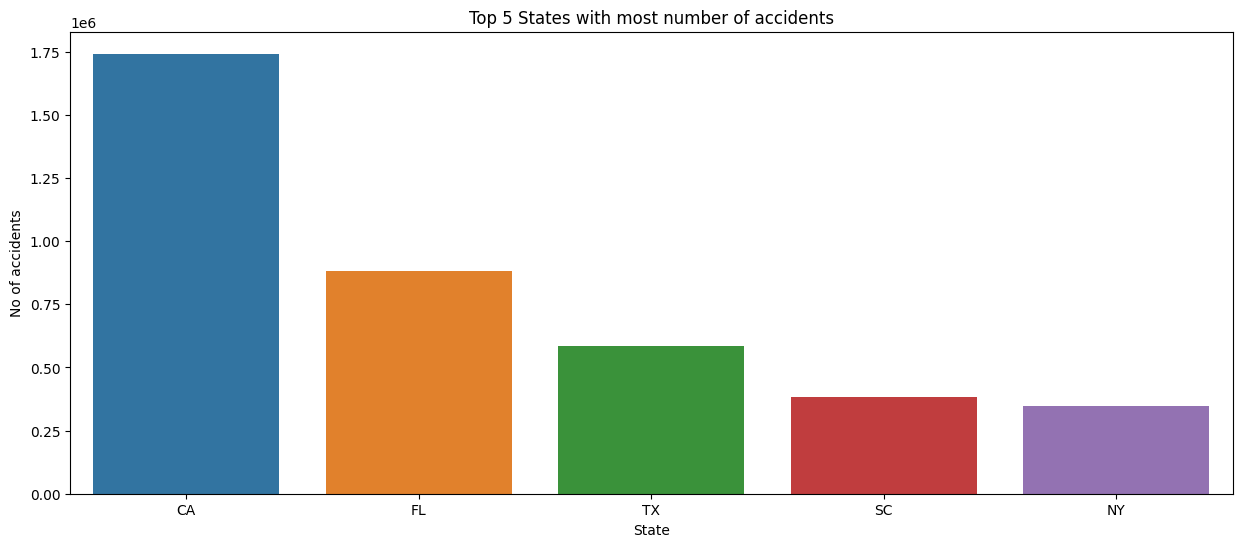

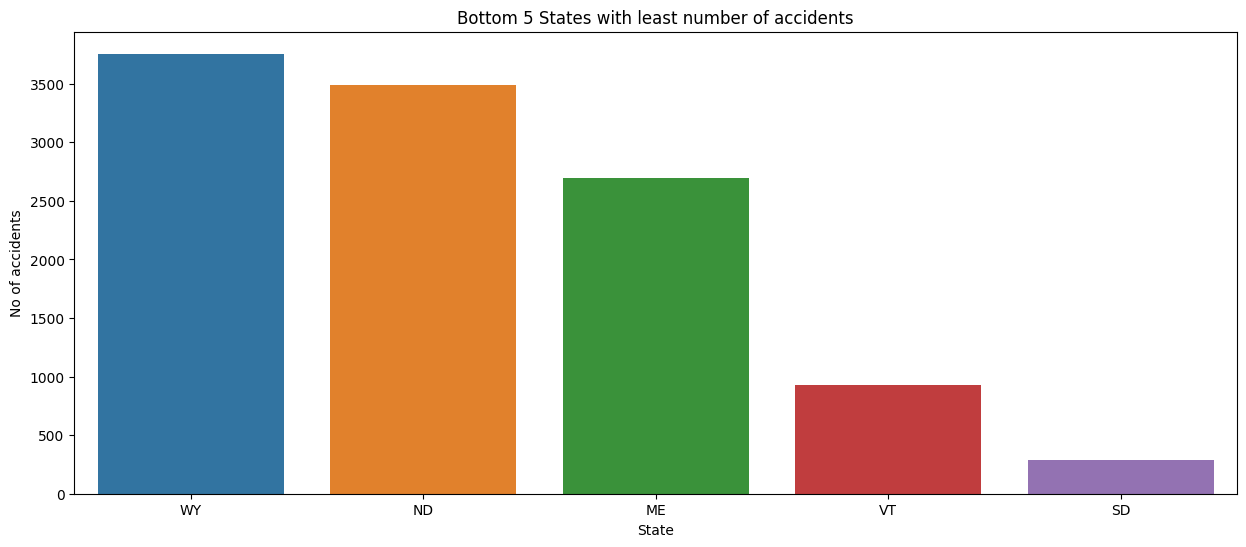

In [18]:
## States with most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='count',data= state_acc.head(5),hue='State')
plt.title("Top 5 States with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

## States with the least number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='count',data= state_acc.tail(5),hue='State')
plt.title("Bottom 5 States with least number of accidents")
plt.ylabel("No of accidents")
plt.show()

Observations:

Miami is the city with most number of accidents

starjunction, stomsburg are among the cities with least number of accidents

California is the state with highest cases of accident

South Dakota(SD) is the state with least cases of accident

In [19]:
df['Severity'].value_counts().index

Index([2, 3, 4, 1], dtype='int64', name='Severity')

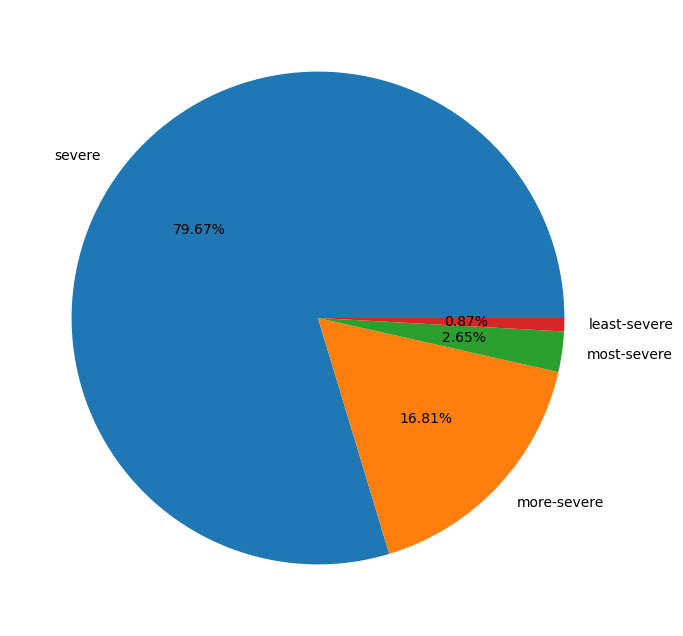

In [20]:
plt.figure(figsize=(8,8))
plt.pie(df['Severity'].value_counts(),labels=['severe','more-severe','most-severe','least-severe'],autopct="%1.2f%%")
plt.show()

In [21]:
# Convert the 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the year from the 'Start_Time' column and store it in a new column called 'Year'
df['Year'] = df['Start_Time'].dt.year

# Display the first few rows to verify
print(df[['Start_Time', 'Year']].head())

           Start_Time    Year
0 2016-02-08 05:46:00  2016.0
1 2016-02-08 06:07:59  2016.0
2 2016-02-08 06:49:27  2016.0
3 2016-02-08 07:23:34  2016.0
4 2016-02-08 07:39:07  2016.0


In [22]:
df['Year'].value_counts()

Year
2021.0    1412433
2022.0    1268806
2020.0    1161598
2019.0     954302
2018.0     893426
2017.0     717290
2016.0     410821
2023.0     166552
Name: count, dtype: int64

### Years with most number of accidents

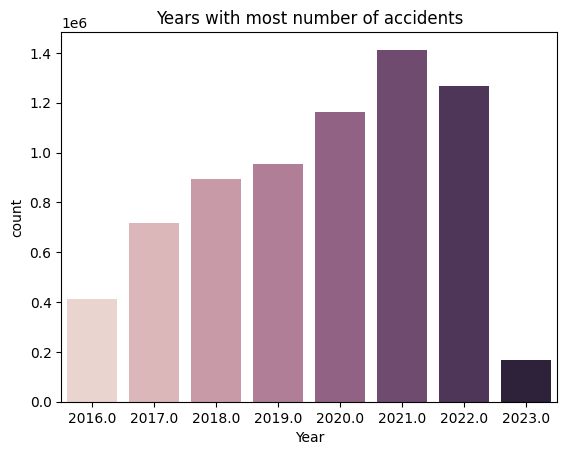

In [23]:
year_count = df['Year'].value_counts().reset_index()
sns.barplot(x='Year',y='count',data=year_count,hue='Year',legend=False)
plt.title("Years with most number of accidents")
plt.show()

Observation:

year 2021 had highest accident rates.

### **Conclusion:**

In this traffic data analysis project, we undertook a comprehensive examination of the accident records, including data cleaning, exploratory data analysis (EDA), and visualization. Here are the key findings and observations from the analysis:

### City-wise Accident Distribution:
Miami stands out as the city with the highest number of accidents. This could be attributed to its high population density and traffic volume.
On the other hand, Star Junction and Stromsburg are among the cities with the least number of accidents, possibly due to their smaller size and lower traffic.

### State-wise Accident Distribution:
California reports the highest number of accident cases, which aligns with its large population and extensive road network.
Conversely, South Dakota (SD) has the least number of accident cases, likely due to its lower population density and traffic volume.

### Yearly Accident Rates:
The year 2021 recorded the highest accident rates, indicating a potential increase in traffic or changes in reporting during this period.